# Hello, Welcome in the development simulator for the LED-Box.

Below you will find some code boxes. They will walk you trough writing Python code for the LED-Box.

First we *import libraries*.

`ulib` contains some libraries specific to the LED-Box. 
* `display` is the library that will actually control the led matrix.
* `display_emu` overwrites the `display` library and provides an emulator, which we will use for prototyping.
* `fancy` is just a implementation of the Hilbert algorithm. Im use it here as an example for what could be displayed on the screen.
The `time` library allows us to wait.

When the program is finished, you just need to replace `from ulib import display_emu as display` with `from ulib import display`

Run this code block by pressing the `run` key in the top control bar

In [1]:
from ulib import display_emu as display
from ulib import fancy
import time

Now we can try to interact with the screen. We can fill the whole display with a solid color like this. 

The color code is a 3-tupel (3 ordered numbers) and is saved in the form of (red, green, blue). The values are in the range of 0 to 255. 

You will see this color representation again later. 

You can try changing the color.

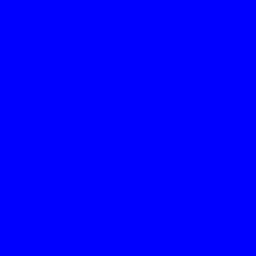

In [2]:
display.fill((0,0,255))

We can set an individual pixel by calling `display.set_xy(<coordinates>,<color>)`

The coordinates are represented by a 2-tupel of the shape (y-position,x-position)

Because updating the screen takes a short moment, this function does not automatically update the screen. 

This also allows you to set multiple pixels and update the display all at once, when you are done.

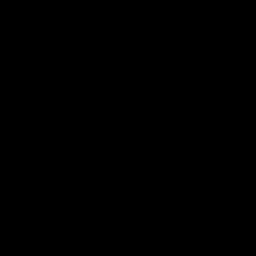

In [5]:
for y in range(0, display.height):
    for x in range(0, display.width):
        display.set_xy((y,x),(x*1.6, y*1.6, x*y/10))
        display.show()
        time.sleep(0.01)
for x in range(0, display.width):
    for y in range(0, display.height):
        display.set_xy((y,x),(0, 0, 0))
    display.show()
    time.sleep(0.16)

Let's try the hilbert curve now.

`fancy.hilbert()` returns a list of coordinates in the order in which tey appear in the curve.

Our display has 256 pixels, so we take the first 256 ertries of the curve.

The `display.fade(<multipliers>)` allows us to fade the red, green and blue cannel independently by a multiplier. The multipliers are a 3-tupel of the shape (red-multiplier, green-multiplier, blue-multiplier) and have to be in the range of 0 to 1. Each color of each pixel is multiplied by its corresponding multiplier.

You can see, that the blue channel is faded less than the red and green. 

Try changing the multipliers!

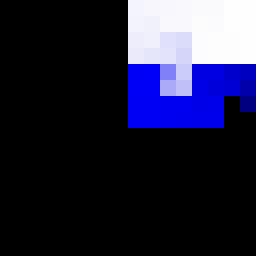

In [16]:
points = fancy.hilbert(256)
for point in points:
    display.set_xy((point[0],point[1]),(255, 255, 255))
    display.show()
    time.sleep(0.05)
    display.fade((0.9, 0.9, 0.95))


There is also a function, which allows you to set a whole range of pixels at once. 

`display.set_m(<pixel_dict>` expects a dictionary, which assigns every pixel a color value like this: `{<position_1>:<color_1>, <position_2>:<color_2>, ... }`

The dictionary can be as long as you want. However the same pixel may not be included twice. 

Remember, that using this function does *not* overwrite pixels, that are not included in the dictionary.

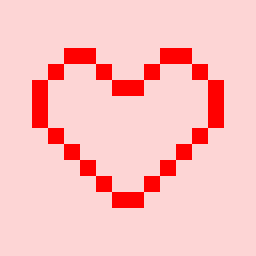

In [17]:
display.fill((100,5,5))
r = (255,0,0)
pixels = {(3,4):r,(3,5):r,(3,10):r,(3,11):r,
          (4,3):r,(4,6):r,(4,9):r,(4,12):r,
          (5,2):r,(5,7):r,(5,8):r,(5,13):r,
          (6,2):r,(6,13):r,
          (7,2):r,(7,13):r,
          (8,3):r,(8,12):r,
          (9,4):r,(9,11):r,
          (10,5):r,(10,10):r,
          (11,6):r,(11,9):r,
          (12,7):r,(12,8):r}
display.set_m(pixels)